<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/tuning/analisis_sensibilidad_tama%C3%B1o_conjunto_datos_frente_al_rendimiento_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Generacion de datos
---

In [2]:
def generator_data(n_samples, n_features = 15, n_informative = 10, n_redundant = 5, random_state = 12354):
  X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, random_state=random_state)
  return X, y

In [3]:
def score(X, y, model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
  return [scores.mean(), scores.std()]

# Model
---

In [4]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# Data Size
---

In [5]:
n_examples = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [6]:
means, stds = [], []

for n in n_examples:
  X, y = generator_data(n, random_state=12345)
  model = DecisionTreeClassifier()
  mean, std = score(X, y, model)
  means.append(mean)
  stds.append(std)

A continuación, podemos resumir la relación entre el tamaño del conjunto de datos y el rendimiento del modelo.

Usaremos la desviación estándar como una medida de incertidumbre sobre el rendimiento estimado del modelo. Esto se puede lograr multiplicando el valor por 2 para cubrir aproximadamente el 95 % del rendimiento esperado si el rendimiento sigue una distribución normal.

Esto se puede mostrar en el gráfico como una barra de error alrededor del rendimiento medio esperado para un tamaño de conjunto de datos.

In [7]:
err = [min(1, s) for s in stds]
err

[0.26331223544175336,
 0.1110055053689781,
 0.046115796281390016,
 0.04339610837646876,
 0.01491248544751084,
 0.011053455970369136,
 0.003289876728524776,
 0.002893786446854719]

<ErrorbarContainer object of 3 artists>

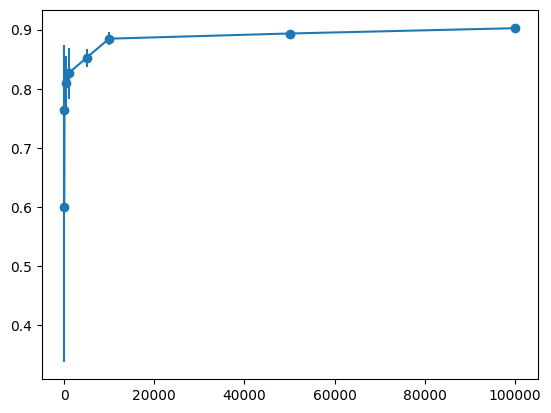

In [8]:
plt.errorbar(n_examples, means, yerr=err, fmt='-o')


- No se aprecia de manera optima algunos detalles, por lotanto se procede a la escala log

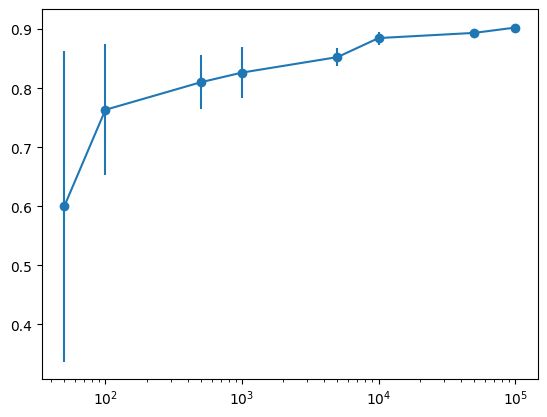

In [9]:
plt.errorbar(n_examples, means, yerr=err, fmt='-o')
ax = plt.gca()
ax.set_xscale("log")

- Se aprecia que el conjunto de datos tiene una reducion sustancial del error, a partir de los 1000 datos. Cabe resaltar que a partir de los 10000 hay una convergencia, posiblemente apartir de este numero el modelo no tenga una mejora significariva con mas datos.



In [10]:
err = [min(1, s * 2) for s in stds]
err

[0.5266244708835067,
 0.2220110107379562,
 0.09223159256278003,
 0.08679221675293752,
 0.02982497089502168,
 0.022106911940738272,
 0.006579753457049552,
 0.005787572893709438]

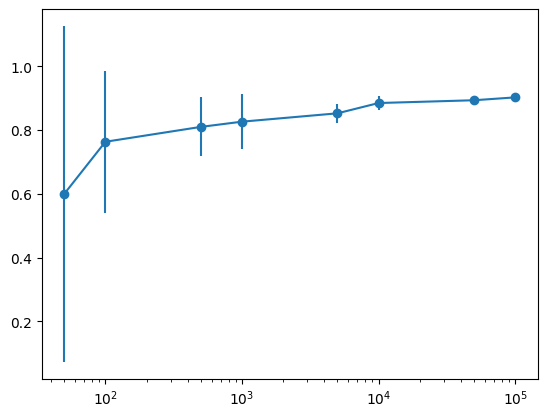

In [11]:
plt.errorbar(n_examples, means, yerr=err, fmt='-o')
ax = plt.gca()
ax.set_xscale("log")

- Se multiplica la desviacion por dos para apreciar de mejor manera el error y para cubrir aproximadamente el 95 % del rendimiento esperado si el rendimiento sigue una distribución normal.
- Se evidencia que la mejora mas significativa fue a partir de los 100 ejemplos.

# **Tres modelos**
---

Recordemos que no se tiene en cuenta que no se aplicó procesos de optimización de modelos, por lo tanto, los modelos instanciados tendrán su configuración por defecto, esto por fines prácticos.

In [12]:
modelo_knn = KNeighborsClassifier()
modelot_tree = DecisionTreeClassifier()
model_regresion_logistica = LogisticRegression()

In [13]:
models = [modelot_tree, model_regresion_logistica, modelo_knn]

In [14]:
means, stds = [], []
for i in models:
  means_model, stds_model = [], []
  print(i)
  for n in n_examples:
    X, y = generator_data(n, random_state=12354)
    mean, std = score(X, y, i)
    means_model.append(mean)
    stds_model.append(std)
  print(i)
  means.append(means_model)
  stds.append(stds_model)

DecisionTreeClassifier()
DecisionTreeClassifier()
LogisticRegression()
LogisticRegression()
KNeighborsClassifier()
KNeighborsClassifier()


In [16]:
err_tree = [min(1, s*2) for s in stds[0]]
err_regresion_logistica = [min(1, s*2) for s in stds[1]]
err_knn = [min(1, s*2) for s in stds[2]]

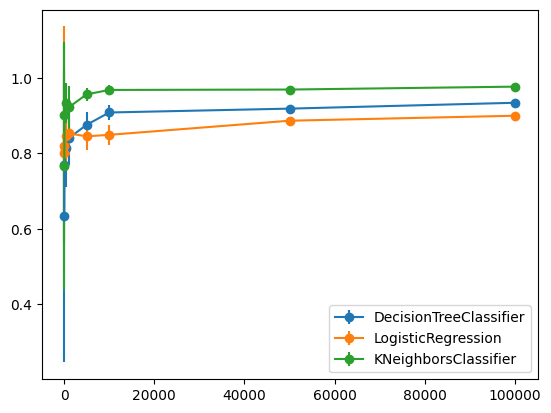

In [26]:
plt.errorbar(n_examples, means[0], yerr=err_tree, fmt='-o', label='DecisionTreeClassifier')
plt.errorbar(n_examples, means[1], yerr=err_regresion_logistica, fmt='-o', label='LogisticRegression')
plt.errorbar(n_examples, means[2], yerr=err_knn, fmt='-o', label='KNeighborsClassifier')
plt.legend(loc='lower right')
plt.show()

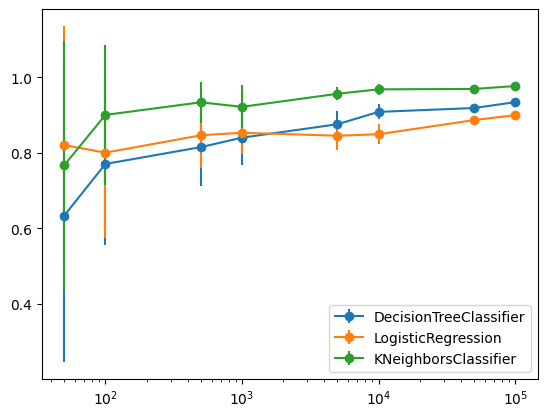

In [27]:
plt.errorbar(n_examples, means[0], yerr=err_tree, fmt='-o', label='DecisionTreeClassifier')
plt.errorbar(n_examples, means[1], yerr=err_regresion_logistica, fmt='-o', label='LogisticRegression')
plt.errorbar(n_examples, means[2], yerr=err_knn, fmt='-o', label='KNeighborsClassifier')
ax = plt.gca()
ax.set_xscale("log")
plt.legend(loc='lower right')

- El modelo que tiene mejor comportamiento es el KNN
- Los modelos empiezan a converger en términos generales con 10000, sin embargo, el KNN reduce su error antes que los otros , aproximadamente con 900 ejemplos, lo que significa que el modelo con más datos apenas tendría una mejora muy reducida.